In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)


In [2]:
df = pd.read_excel("Telco_customer_churn_adapted_v2.xlsx")
df.head()

Customer ID  Tenure Months Location Device Class Games Product  \
0            0              2  Jakarta      Mid End           Yes   
1            1              2  Jakarta     High End            No   
2            2              8  Jakarta     High End            No   
3            3             28  Jakarta     High End            No   
4            4             49  Jakarta     High End            No   

  Music Product Education Product Call Center Video Product Use MyApp  \
0           Yes                No          No            No        No   
1            No                No          No            No        No   
2            No               Yes          No           Yes       Yes   
3            No               Yes         Yes           Yes       Yes   
4           Yes               Yes          No           Yes       Yes   

   Payment Method  Monthly Purchase (Thou. IDR) Churn Label   Longitude  \
0  Digital Wallet                        70.005         Yes  106.816666   
1           Pulsa                        91.910         Yes  106.816666   
2           Pulsa                       129.545         Yes  106.816666   
3           Pulsa                       136.240         Yes  106.816666   
4           Debit                       134.810         Yes  106.816666   

   Latitude  CLTV (Predicted Thou. IDR)  
0      -6.2                      4210.7  
1      -6.2                      3511.3  
2      -6.2                      6983.6  
3      -6.2                      6503.9  
4      -6.2                      6942.0

In [3]:
df.isna().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [10]:
df.groupby('Location')['Churn Label'].value_counts()

Location  Churn Label
Bandung   No             1466
          Yes             546
Jakarta   No             3708
          Yes            1323
Name: Churn Label, dtype: int64

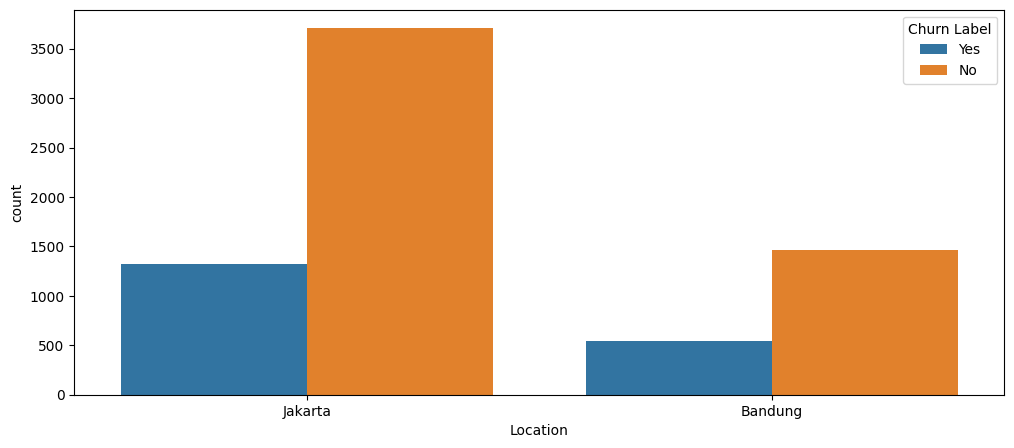

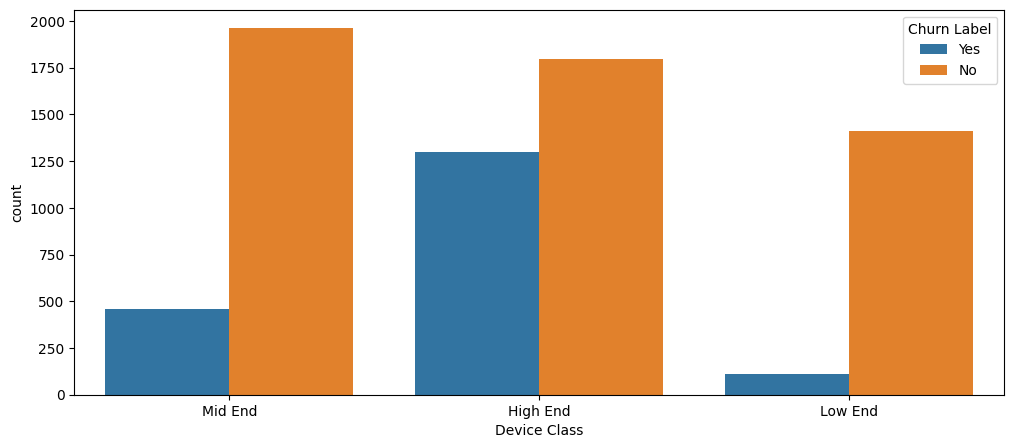

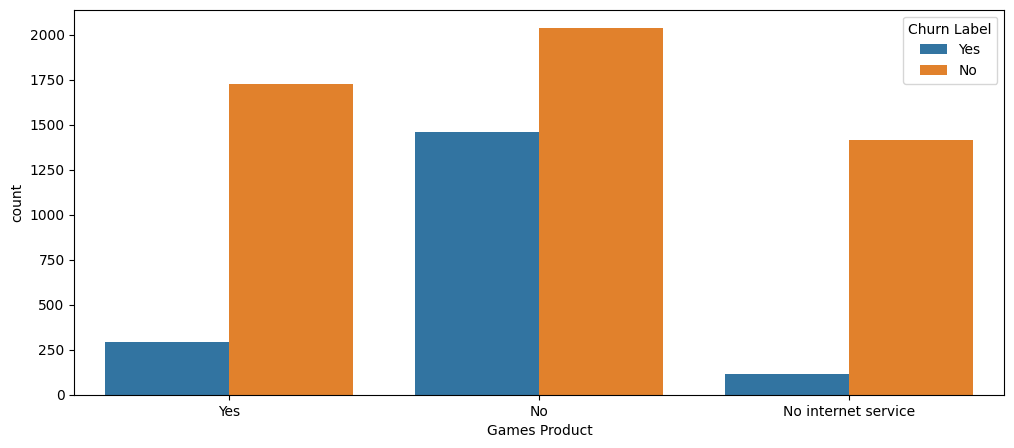

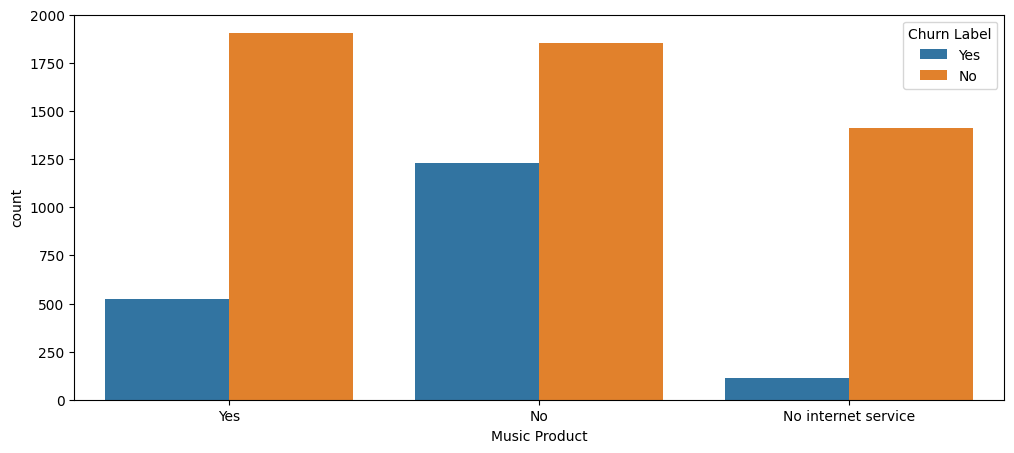

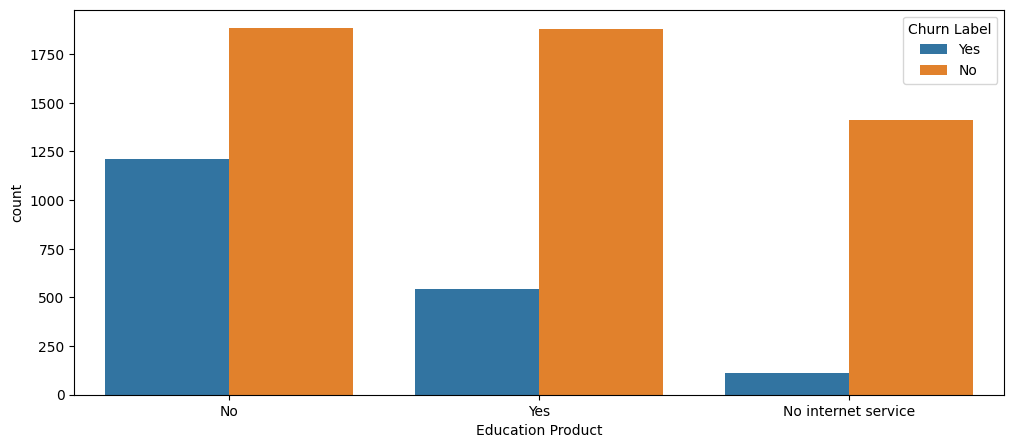

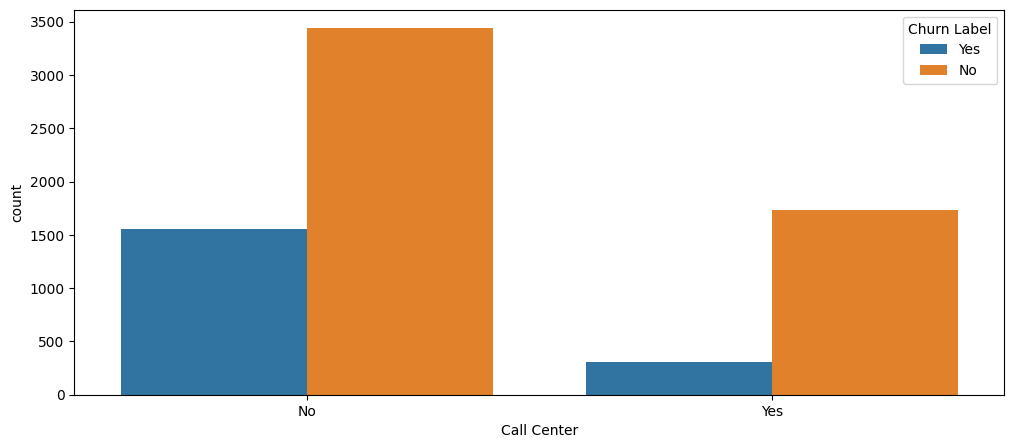

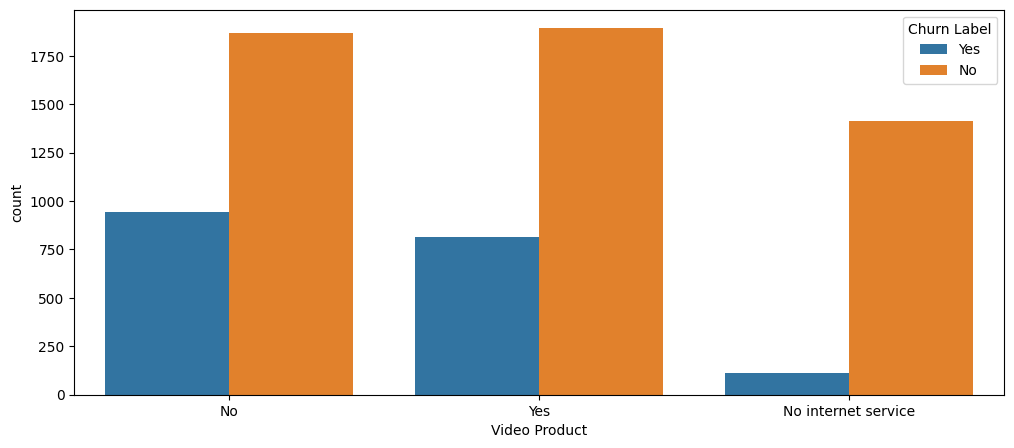

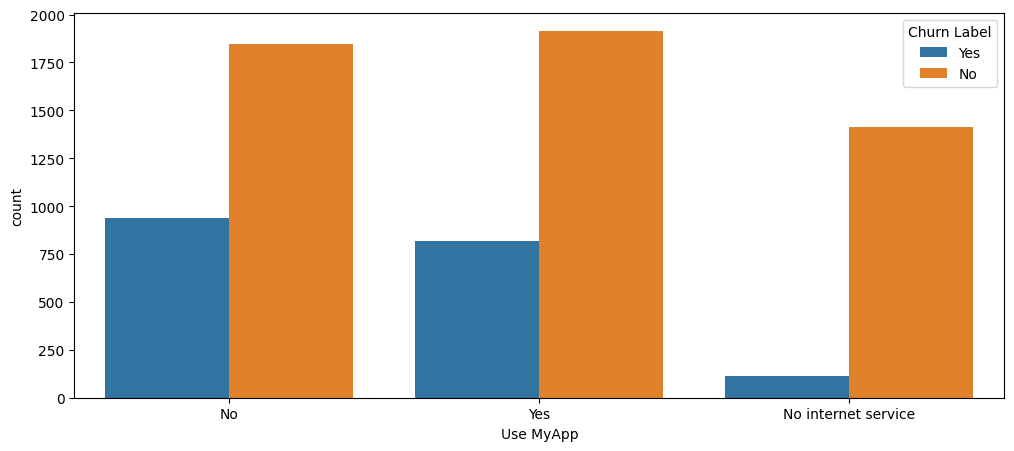

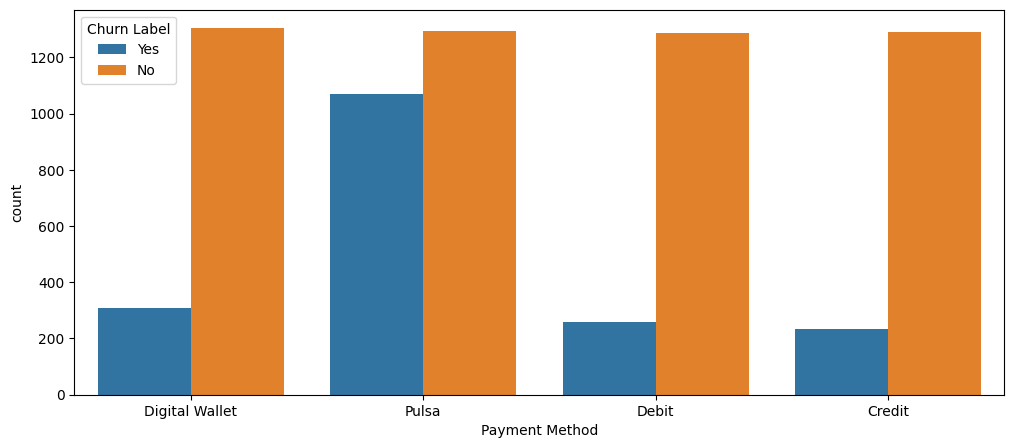

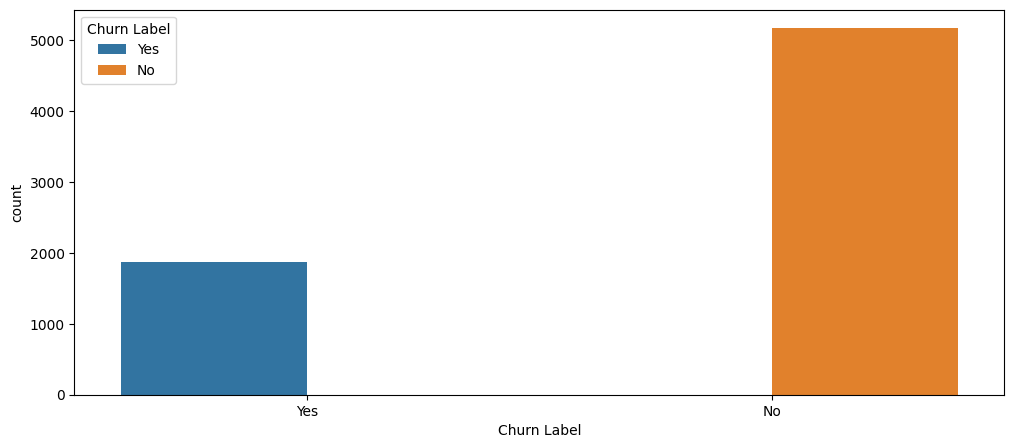

In [6]:
# plot cat features vs target
for i in df.columns:
    if df[i].dtype == 'object':
        plt.figure(figsize=(12,5))
        sns.countplot(x=i, hue='Churn Label', data=df)
        plt.xlabel(i)
        plt.show()

<h3> First time analysis Categorical Features with Target</h3>

* Customer who lives in Jakarta have a tendency to churn than customer who lives in Bandung
* Customer who using High End Device have a highest possibility to churn than another customer with mid or low end device. 
* Customer who not uses internet service for game product have a highest possibility to churn than another customer. From this information, we suppose : 
    * the internet service have a good performance for customer who like playing game.
* Customer who not uses internet service for music product have a highest possibility to churn than another customer.
* Customer who not uses internet service for education product have a highest possibility to churn than another
* Customer who not uses call center service have a tendency to churn than customer who use call center service. From this information, we suppose :
    * The customer doesn't know how to uses call center service, this indicate they are churn
    * The call center service itself cannot help customer solve their problem, this indicate some customers who uses call center still churn    
* Both customer who uses and not uses video product have a tendency to churn
* Both customer who uses and not uses myApp service have a tendency to churn
* Customer who use pulsa as payment method have a highest possibility to churn than another customer. We suppose :
    * The customer encounter loss their pulsa when the internet services is on (normal situation)




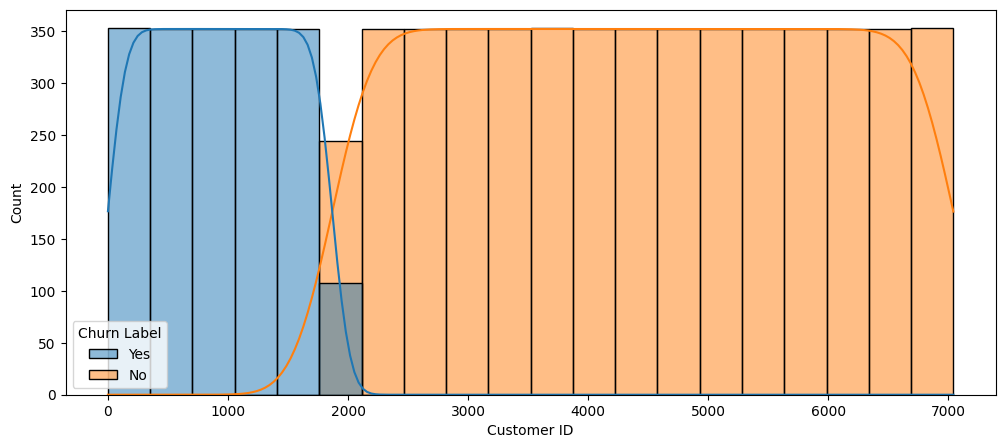

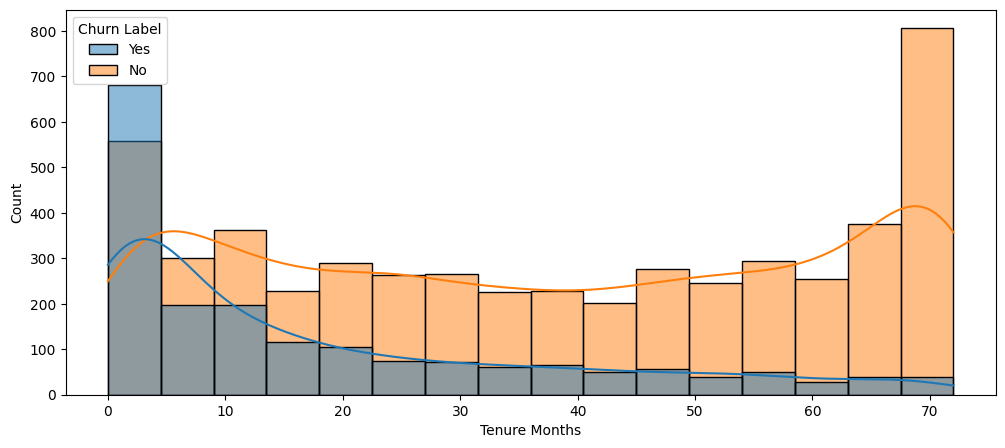

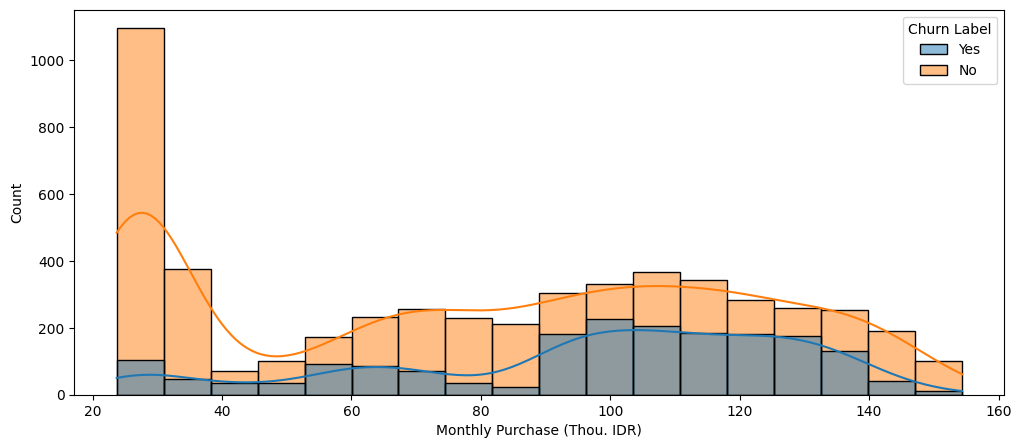

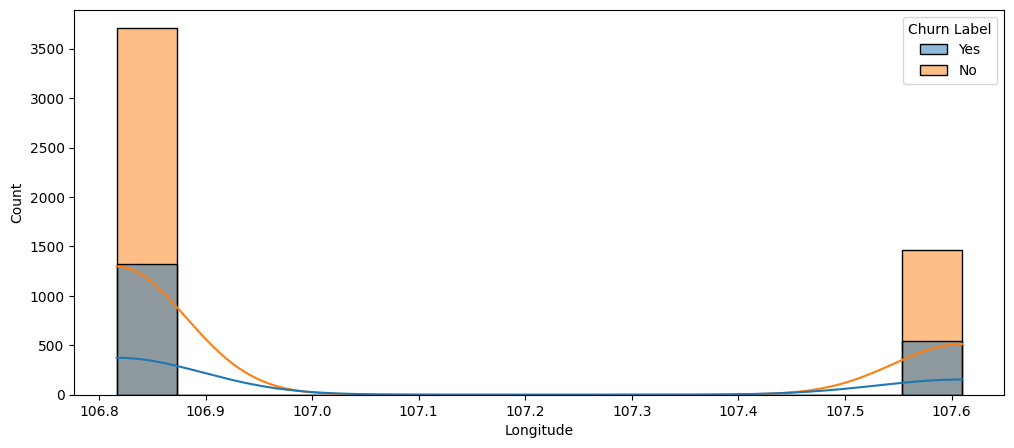

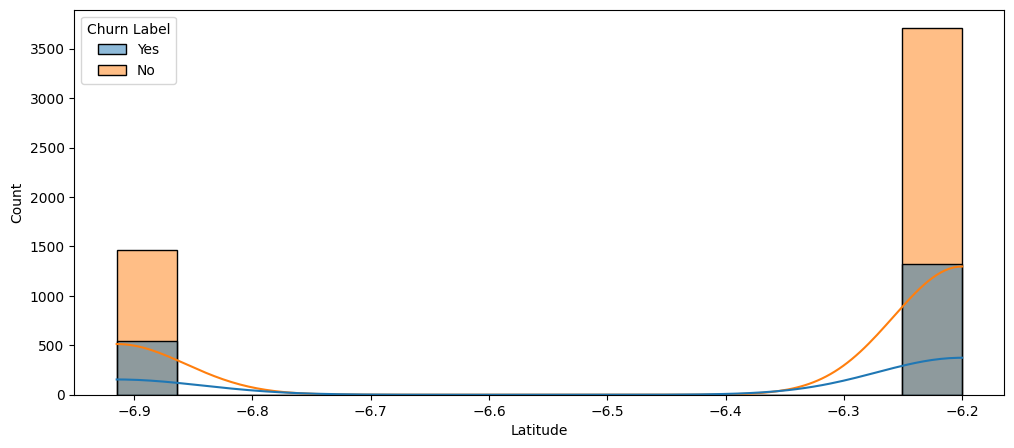

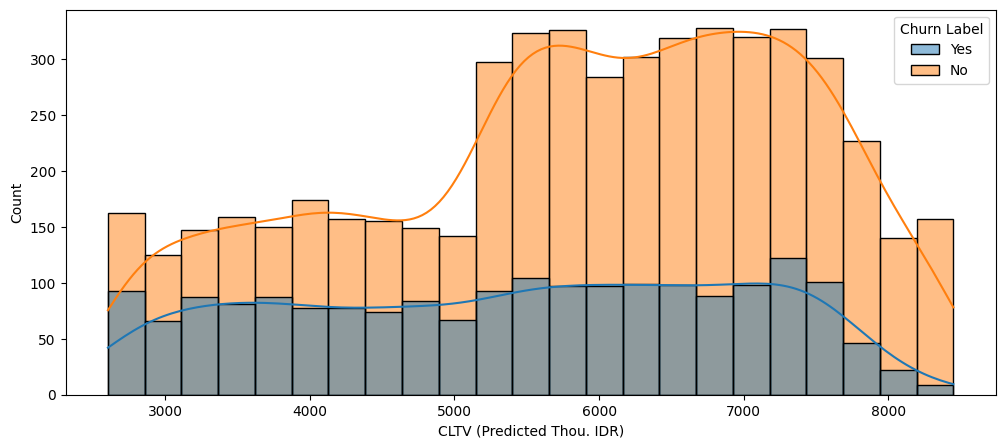

In [7]:
# plot numerical features vs target
for i in df.columns:
    if df[i].dtype != 'object':
        plt.figure(figsize=(12,5))
        sns.histplot(x=i, hue='Churn Label', data=df, kde=True)
        plt.xlabel(i)
        plt.show()

<h3> First time numerical feature with target </h3>

* Among the customers in the dataset, 26.5% of customers are in churn and have stopped using the company's services
* Geography of the customers according to longitude and latitude just represent two city not every district in the city.
* 50% of the customers who left the service did so in the first 10 months. The number of clients in the churn ceases to decline sharply after 5 months in the service.
* The client's lifetime before the churn is very important information, Usually the first months in the service are the most risky, since customers may have their own expectations from the service and so on
* Customers with higher tenure months tend to stay with the company.

Let's deep dive explore the data.

In [8]:
df.groupby('Churn Label')['Customer ID'].nunique()
 

Churn Label
No     5174
Yes    1869
Name: Customer ID, dtype: int64

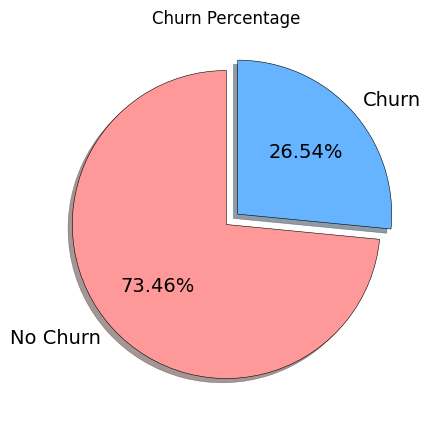

In [9]:
plt.figure(figsize=(5,5))
plt.pie(df.groupby('Churn Label')['Customer ID'].nunique(), 
        labels=['No Churn', 'Churn'], 
        autopct='%.2f%%', 
        explode=[0,0.1], 
        shadow=True,
        startangle=90, 
        textprops={'fontsize': 14},
        colors=['#ff9999','#66b3ff'],
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.4}
        )
plt.title('Churn Percentage')
plt.show()



Customer's lifetime in the service

In [10]:
df.groupby('Churn Label')['Tenure Months'].describe()

count       mean        std  min   25%   50%   75%   max
Churn Label                                                           
No           5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes          1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

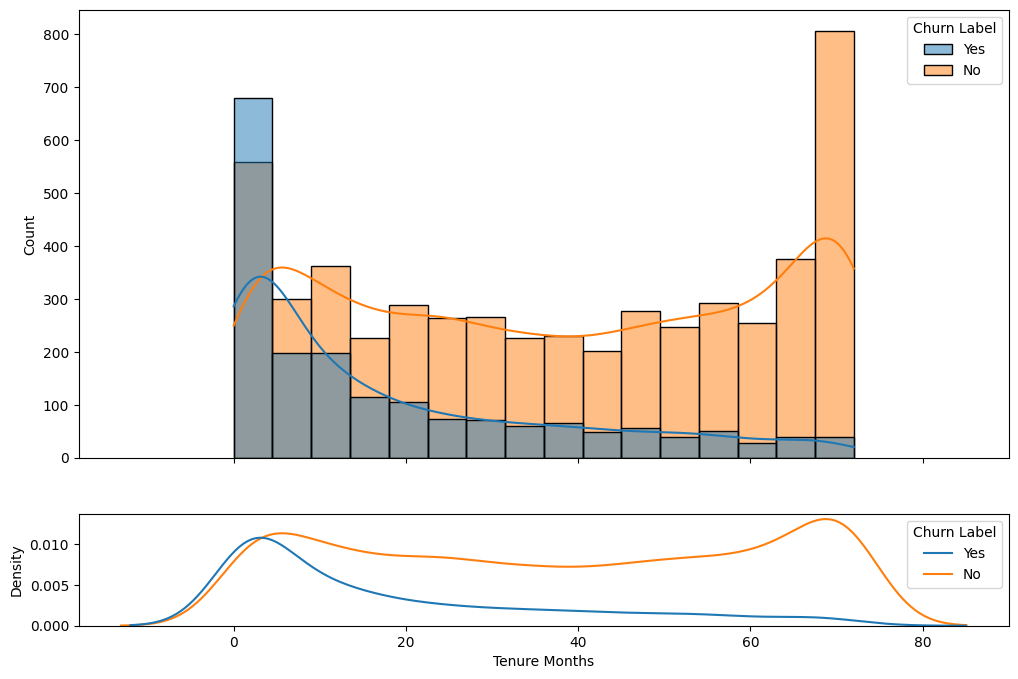

In [11]:
fig, (ax_hist, ax_kde) = plt.subplots(2, sharex=True, figsize=(12,8), gridspec_kw={"height_ratios": (.8, .2)})
sns.histplot(x='Tenure Months', hue='Churn Label', data=df, kde=True, ax=ax_hist)
sns.kdeplot(x='Tenure Months', hue='Churn Label', data=df, ax=ax_kde)
plt.xlabel('Tenure Months')
plt.show()


<Figure size 1200x500 with 0 Axes>

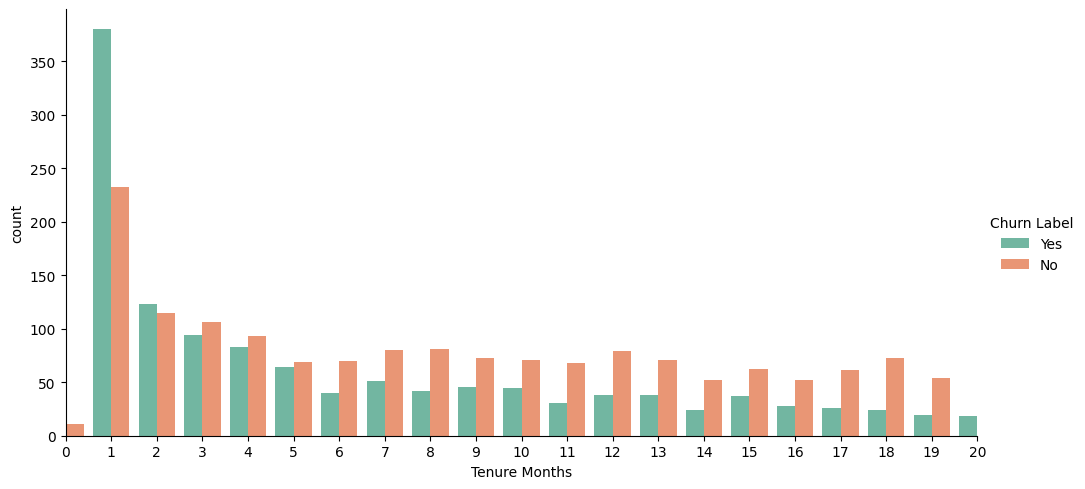

In [12]:
# plot churn vs tenure zoom into 0-20 months
plt.figure(figsize=(12,5))
sns.catplot(x='Tenure Months', hue='Churn Label', data=df, kind='count', height=5, aspect=2, palette='Set2')
plt.xlabel('Tenure Months')
plt.xlim(0,20)
plt.show()

Well, we know that in general 26.5% of customers have stopped using our service and 50% of such customers have used our service for 10 months or less.

In [29]:
df_tenure_0_50 = df[df['Tenure Months'] <= 10]
df_tenure_0_50.groupby('Churn Label')['Customer ID'].nunique() / df_tenure_0_50['Customer ID'].nunique() * 100

Churn Label
No     50.862944
Yes    49.137056
Name: Customer ID, dtype: float64

In [30]:
df_tenure_50_100 = df[df['Tenure Months'] > 10]
df_tenure_50_100.groupby('Churn Label')['Customer ID'].nunique() / 
    df_tenure_50_100['Customer ID'].nunique() * 100

Churn Label
No     82.239306
Yes    17.760694
Name: Customer ID, dtype: float64

Now, how about monthly purchase by customer

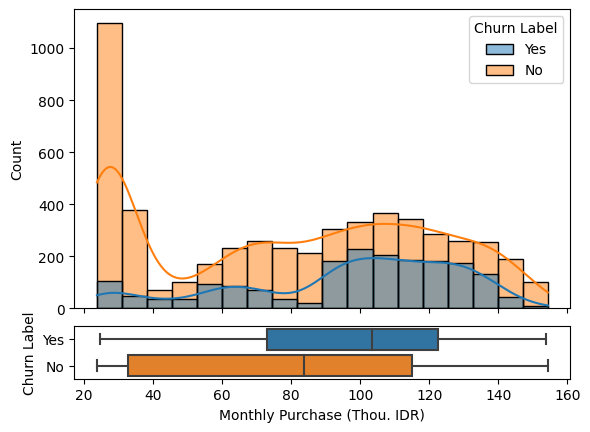

In [13]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})

sns.histplot(data=df, x="Monthly Purchase (Thou. IDR)", hue="Churn Label", ax=ax_hist, kde=True)
ax_hist.set_xlabel("") 

sns.boxplot(data=df, x="Monthly Purchase (Thou. IDR)", y="Churn Label", ax=ax_box)
ax_box.set_xlabel("Monthly Purchase (Thou. IDR)") 
plt.subplots_adjust(hspace=0.1)

plt.show()

In [14]:
df.groupby('Churn Label')['Monthly Purchase (Thou. IDR)'].describe()

count       mean        std     min     25%       50%     75%  \
Churn Label                                                                   
No           5174.0  79.644661  40.420443  23.725  32.630   83.7525  114.92   
Yes          1869.0  96.773732  32.065869  24.505  72.995  103.5450  122.46   

                 max  
Churn Label           
No           154.375  
Yes          153.855

The median monthly charges of customers who have left the service are higher than those of customers who are still active. This might be due to certain services. We will explore later

Let's check how CLTV with Churn Label work

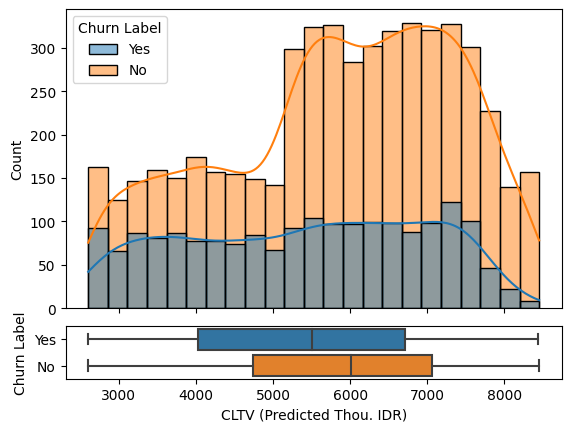

In [18]:
# plot churn vs CLTV
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})
sns.histplot(data=df, x="CLTV (Predicted Thou. IDR)", hue="Churn Label", ax=ax_hist, kde=True)
ax_hist.set_xlabel("")
sns.boxplot(data=df, x="CLTV (Predicted Thou. IDR)", y="Churn Label", ax=ax_box)
ax_box.set_xlabel("CLTV (Predicted Thou. IDR)")
plt.subplots_adjust(hspace=0.1)
plt.show()


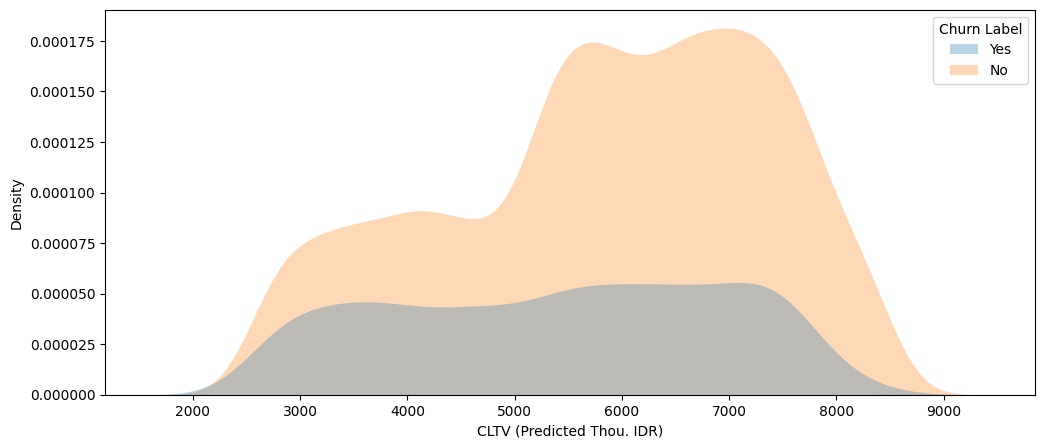

In [21]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=df, x="CLTV (Predicted Thou. IDR)", hue="Churn Label", fill=True, alpha=.3, linewidth=0)
plt.xlabel("CLTV (Predicted Thou. IDR)")
plt.show()

In [22]:
df.groupby('Churn Label')['CLTV (Predicted Thou. IDR)'].describe()

count         mean          std     min       25%     50%  \
Churn Label                                                               
No           5174.0  5838.197739  1518.014157  2603.9  4736.875  6006.0   
Yes          1869.0  5394.239058  1546.181920  2603.9  4031.300  5509.4   

                  75%     max  
Churn Label                    
No           7065.175  8450.0  
Yes          6715.800  8429.2

From the visualisation above, customer who not to be churn have a higher value in the start, we suppose because they are OK with the services and use all of them. But we need to explore it more later. The information is normal, customer with tendency to be churn have a smaller CLTV than loyal customer

<h3> Analysis from feature with feature </h3>


In [24]:
df_corr = df.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df_corr.columns:
    if df_corr[i].dtype == 'object':
        df_corr[i] = le.fit_transform(df_corr[i])

df_corr.head()

Customer ID  Tenure Months  Location  Device Class  Games Product  \
0            0              2         1             2              2   
1            1              2         1             0              0   
2            2              8         1             0              0   
3            3             28         1             0              0   
4            4             49         1             0              0   

   Music Product  Education Product  Call Center  Video Product  Use MyApp  \
0              2                  0            0              0          0   
1              0                  0            0              0          0   
2              0                  2            0              2          2   
3              0                  2            1              2          2   
4              2                  2            0              2          2   

   Payment Method  Monthly Purchase (Thou. IDR)  Churn Label   Longitude  \
0               2                        70.005            1  106.816666   
1               3                        91.910            1  106.816666   
2               3                       129.545            1  106.816666   
3               3                       136.240            1  106.816666   
4               1                       134.810            1  106.816666   

   Latitude  CLTV (Predicted Thou. IDR)  
0      -6.2                      4210.7  
1      -6.2                      3511.3  
2      -6.2                      6983.6  
3      -6.2                      6503.9  
4      -6.2                      6942.0

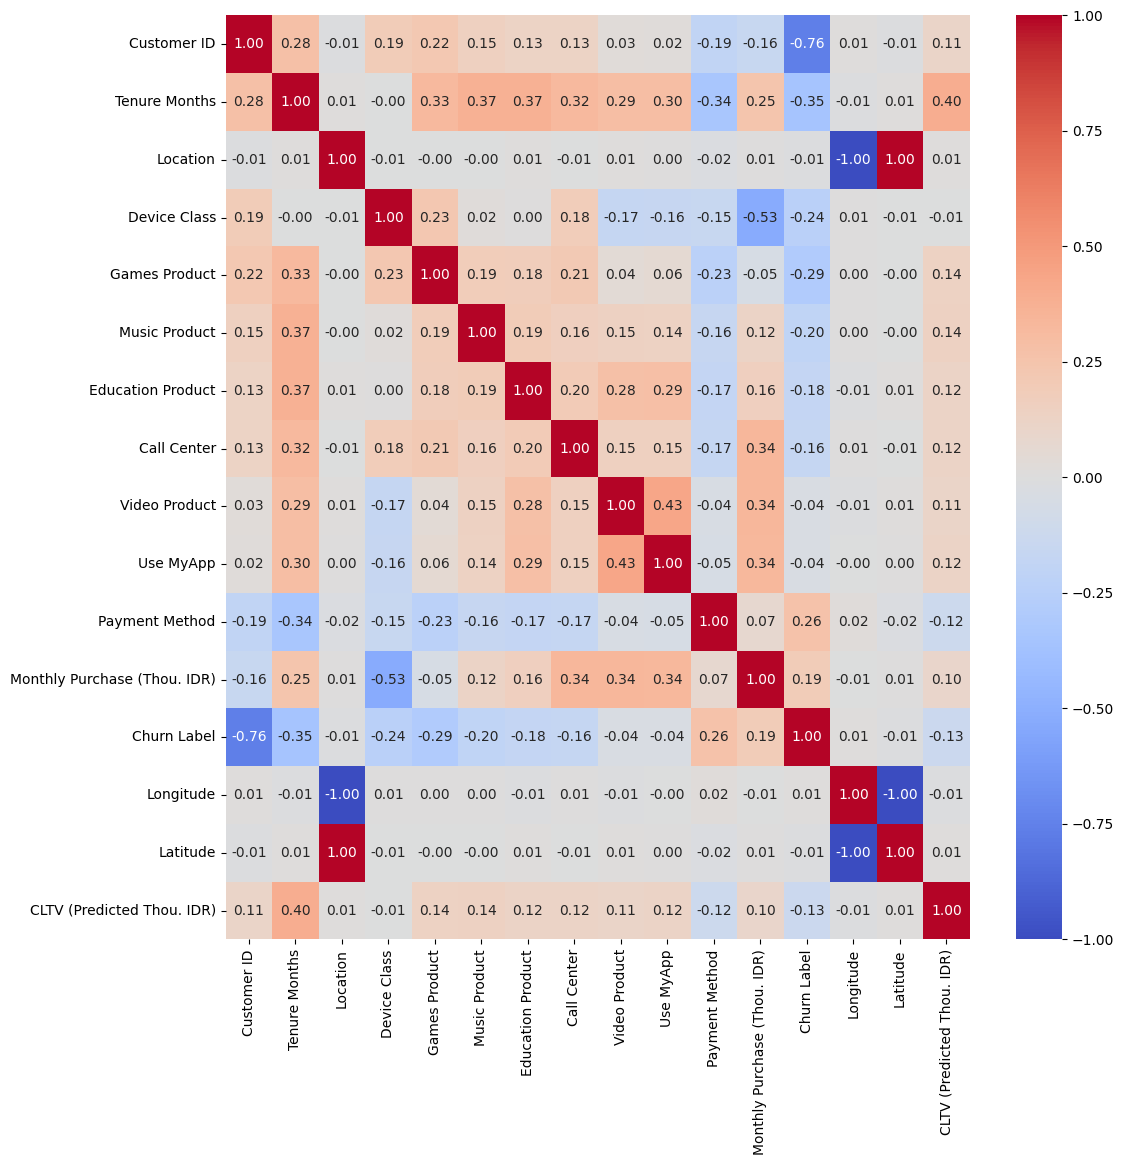

In [31]:
# plot df corr matrix, batasan 2 digit di belakang koma
plt.figure(figsize=(12,12))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

<h3>Brief Analysis From Correlation Matrix</h3>
this analysis would be determine how the way of analysis later

POSITIVE CORR :
* Tenure Months features have a strong correlation with CLTV, Monthly Purchase, and all of the product
* Device class have a strong correlation with call center and game product
* All of product have a correlation each other. Also have strong correlation with Tenure Months. A Bit correlation with CLTV and exponent correlation with Monthly Purchase start from Games-Use MyApp.

* Payment Method have a strong correlation with target
* Monthly Purchase have a bit correlation with CLTV and churn label
* Churn label have strong correlation with monthly purchase and payment method
* CLTV have a strong correlation with Tenure Months, and a bit with all of product then Monthly Purchase

NEGATIVE CORR :
* Tenure Months have a negative correlation with Churn Label and Payment method
* Device Class have a Strong Negative Correlation with Churn Label, Monthly Purchase. Then, have a bit corr with payment method, use my app and video product.
* Games Product have a Strong Neg corr with Churn label and payment method
* Music, Education, Call Center also have some neg corr with churn label and payment method
* Video product and Use MyApp with Device class
* Payment method with tenure months, device class, and all of product service
* Monthly Purchase with Device Class (What? anomaly?)
* Churn label with Tenure Month, then all of product service and CLTV
* CLTV only with Churn label and Payment Method



we need to see :

* tenure months + monthly purchase vs churn label
* tenure + cltv vs churn label
* tenure + all of product vs label

C:\Users\Kresna\AppData\Local\Temp\ipykernel_25876\2181197001.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='Tenure Months', ylabel='Monthly Purchase (Thou. IDR)'>

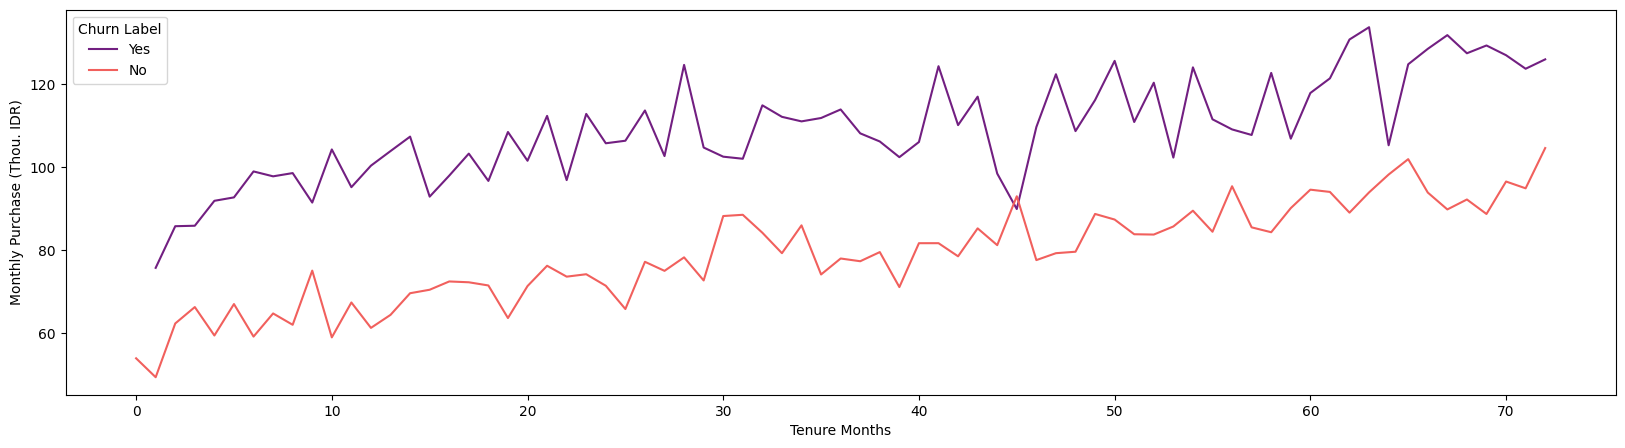

In [85]:
# tenure months + monthly purchase vs churn
plt.figure(figsize=(20,5))
sns.lineplot(x=df_corr['Tenure Months'], y=df_corr['Monthly Purchase (Thou. IDR)'],  hue=df['Churn Label'], ci=None, palette='magma')


It show how the customer with high monthly purchase have a tendency to churn. We need explore why become like this

C:\Users\Kresna\AppData\Local\Temp\ipykernel_25876\2180220228.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df_corr['Tenure Months'], y=df_corr['CLTV (Predicted Thou. IDR)'], hue=df['Churn Label'], ci=None, palette='rocket')


<Axes: xlabel='Tenure Months', ylabel='CLTV (Predicted Thou. IDR)'>

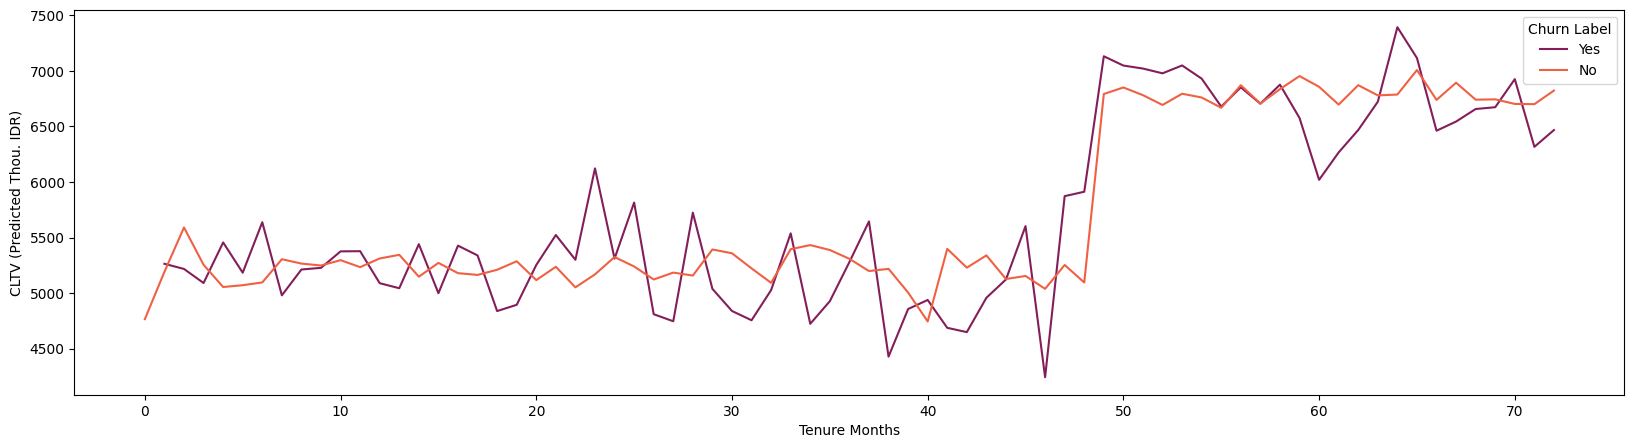

In [55]:
# tenure months + cltv vs churn
plt.figure(figsize=(20,5))
sns.lineplot(x=df_corr['Tenure Months'], y=df_corr['CLTV (Predicted Thou. IDR)'], hue=df['Churn Label'], ci=None, palette='rocket')


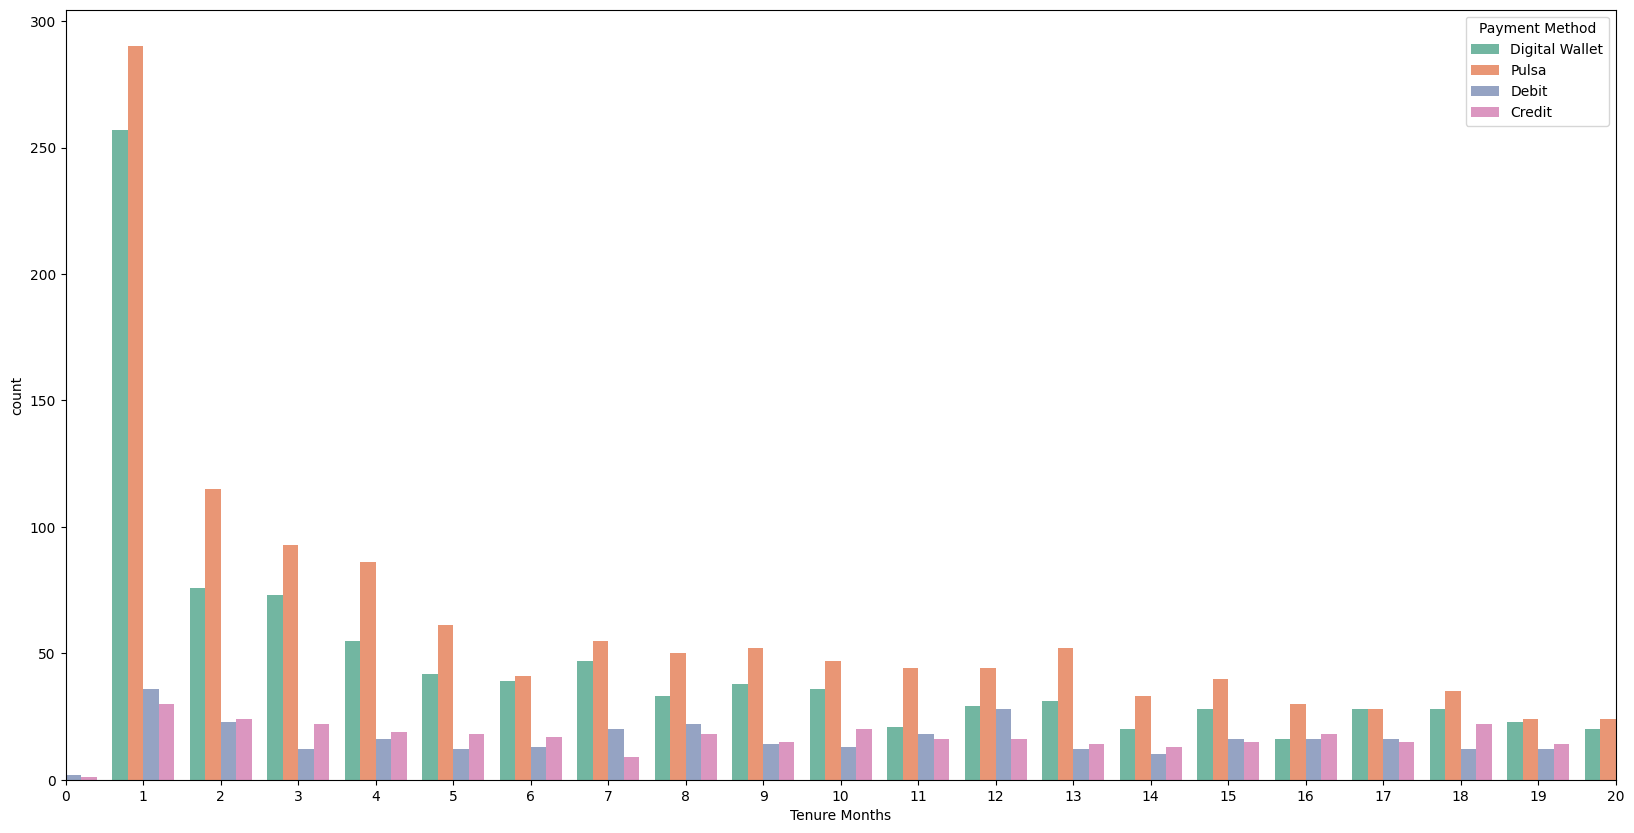

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Tenure Months'], hue=df['Payment Method'], palette='Set2')
plt.xlabel('Tenure Months')
plt.xlim(0,20)
plt.show()


In [80]:
# I want to see the churn rate per tenure months per payment method
fig = px.histogram(df, x="Tenure Months", color="Payment Method", facet_col="Churn Label", facet_row="Payment Method",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Tenure Months per Payment Method", title_x=0.5)
fig.show()

Payment Method Pulsa and Digital Wallet have a tendency to make customer churn

In [109]:
# tenure x device class x churn
fig = px.histogram(df, x="Tenure Months", color="Device Class", facet_col="Churn Label", facet_row="Device Class",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Tenure Months per Device Class", title_x=0.5)
fig.show()

It seems high end device tend to be churn

Let's us know how monthly purchase customer who lives in Jakarta and Bandung

In [121]:
# monthly purchase x location
fig = px.histogram(df, x="Monthly Purchase (Thou. IDR)", color="Location", facet_col="Churn Label", facet_row="Location",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Monthly Purchase per Location", title_x=0.5)
fig.show()

Let's Start analysis correlation between Device Class with Product Services

In [99]:
fig = px.histogram(df, x="Device Class", color="Games Product", facet_col="Churn Label", facet_row="Games Product",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Games Product by Device", title_x=0.5)
fig.show()



In [100]:
fig = px.histogram(df, x="Device Class", color="Music Product", facet_col="Churn Label", facet_row="Music Product",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Music Product by Device", title_x=0.5)
fig.show()

In [101]:
fig = px.histogram(df, x="Device Class", color="Education Product", facet_col="Churn Label", facet_row="Education Product",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Education Product by Device", title_x=0.5)
fig.show()

In [97]:
fig = px.histogram(df, x="Device Class", color="Call Center", facet_col="Churn Label", facet_row="Call Center",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Tenure Months per Call Center Complaints", title_x=0.5)
fig.show()

In [123]:
# x tenure months, y churn rate, hue video product
fig = px.histogram(df, x="Device Class", color="Video Product", facet_col="Churn Label", facet_row="Video Product",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Video Product by Device", title_x=0.5)
fig.show()

In [106]:
# x device class, y churn rate, hue Use MyApp
fig = px.histogram(df, x="Device Class", color="Use MyApp", facet_col="Churn Label", facet_row="Use MyApp",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Use MyApp by Device", title_x=0.5)
fig.show()

From the analysis of Device Class and the Product Services, we found the customer with high end device tend to be churn in several product like Use MyApp and Video Product.

In [122]:
# device x payment method
fig = px.histogram(df, x="Device Class", color="Payment Method", facet_col="Churn Label", facet_row="Payment Method",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Device by Payment Method", title_x=0.5)
fig.show()


It show high end device is often use Pulsa as payment method. 

In [127]:
fig = px.histogram(df, x="Monthly Purchase (Thou. IDR)", color="Device Class", facet_col="Churn Label", facet_row="Device Class",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Monthly Purchase per Device Class", title_x=0.5)
fig.show()

Why high end device tend to be churn with they are using pulsa as payment method? Let's explore this problem

In [33]:
fig = px.histogram(df, x="Monthly Purchase (Thou. IDR)", color="Device Class", facet_col="Churn Label", facet_row=df['Payment Method'] == 'Pulsa',
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Monthly Purchase per Device Class", title_x=0.5)
fig.show()

High end class tend to be churn because monthly purchase are highest when using Pulsa

In [135]:
fig = px.histogram(df, x="Monthly Purchase (Thou. IDR)", color="Device Class", facet_col="Churn Label", facet_row="Video Product",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Monthly Purchase of Video Product per Device Class", title_x=0.5)
fig.show()

It look we have 2 position, where High End Device who using Video product tend to be churn
and High End Device who not using Video product is tend to be churn. But, from the graph we know that video product is quite expensive

To confirm video product is quite expensive with Pulsa, let's check for the payment method to make sure 

In [36]:
fig = px.histogram(df, x="Monthly Purchase (Thou. IDR)", color="Churn Label", facet_col='Payment Method', facet_row="Video Product",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Monthly Purchase of Use MyApp per Device Class", title_x=0.5)
fig.show()

From data above, we know that the video product not quite expensive. It show for some people still use the service's even though we though it expensive.  

In [145]:
# plot monthly purchase x churn label x payment method x video product x device class
fig = px.scatter(df, x="Monthly Purchase (Thou. IDR)", y="Payment Method", color="Device Class", facet_col="Churn Label", facet_row="Video Product",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Monthly Purchase of Video Product per Device Class", title_x=0.5)
fig.show()

In [159]:
df.groupby('Churn Label')['Payment Method'].value_counts() / df.groupby('Churn Label')['Payment Method'].count() * 100

Churn Label  Payment Method
No           Digital Wallet    25.202938
             Pulsa             25.009664
             Credit            24.932354
             Debit             24.855044
Yes          Pulsa             57.303371
             Digital Wallet    16.479401
             Debit             13.804173
             Credit            12.413055
Name: Payment Method, dtype: float64

In [160]:
df.groupby('Churn Label')['Device Class'].value_counts() / df.groupby('Churn Label')['Device Class'].count() * 100

Churn Label  Device Class
No           Mid End         37.920371
             High End        34.770004
             Low End         27.309625
Yes          High End        69.395399
             Mid End         24.558587
             Low End          6.046014
Name: Device Class, dtype: float64

In [161]:
df.groupby('Churn Label')['Video Product'].value_counts() / df.groupby('Churn Label')['Video Product'].count() * 100

Churn Label  Video Product      
No           Yes                    36.586780
             No                     36.103595
             No internet service    27.309625
Yes          No                     50.401284
             Yes                    43.552702
             No internet service     6.046014
Name: Video Product, dtype: float64

In [137]:
fig = px.histogram(df, x="Monthly Purchase (Thou. IDR)", color="Device Class", facet_col="Churn Label", facet_row="Use MyApp",
                        height=1000, width=1000)
fig.update_layout(title_text="Churn Rate per Monthly Purchase of Use MyApp per Device Class", title_x=0.5)
fig.show()

In [166]:
df.groupby('Churn Label')['Use MyApp'].value_counts() / df.groupby('Churn Label')['Use MyApp'].count() * 100

Churn Label  Use MyApp          
No           Yes                    36.992656
             No                     35.697719
             No internet service    27.309625
Yes          No                     50.187266
             Yes                    43.766720
             No internet service     6.046014
Name: Use MyApp, dtype: float64

In [40]:
df.groupby('Churn Label')['Location', 'Device Class'].value_counts()

Churn Label  Location  Device Class
No           Jakarta   Mid End         1397
                       High End        1309
                       Low End         1002
             Bandung   Mid End          565
                       High End         490
                       Low End          411
Yes          Jakarta   High End         912
             Bandung   High End         385
             Jakarta   Mid End          322
             Bandung   Mid End          137
             Jakarta   Low End           89
             Bandung   Low End           24
dtype: int64

In [54]:
df.groupby('Churn Label')['Device Class', 'Music Product', 'Games Product', 'Education Product', 'Call Center'].value_counts()

Churn Label  Device Class  Music Product        Games Product        Education Product    Call Center
No           Low End       No internet service  No internet service  No internet service  No             1413
             High End      No                   No                   No                   No              309
             Mid End       Yes                  Yes                  Yes                  Yes             270
                           No                   No                   No                   No              240
             High End      Yes                  Yes                  Yes                  Yes             175
                                                No                   Yes                  No              170
                                                                     No                   No              158
                           No                   No                   Yes                  No              157
             Mid E

In [95]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [82]:
df_service = df.copy()

service = ['Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp']

for i in service:
    df_service[i] = df_service[i].replace(['No', 'Yes', 'No internet service'], [0, 1, 0])

df_service['service_count'] = df_service[service].sum(axis=1)

df_service.head()

Customer ID  Tenure Months Location Device Class  Games Product  \
0            0              2  Jakarta      Mid End              1   
1            1              2  Jakarta     High End              0   
2            2              8  Jakarta     High End              0   
3            3             28  Jakarta     High End              0   
4            4             49  Jakarta     High End              0   

   Music Product  Education Product  Call Center  Video Product  Use MyApp  \
0              1                  0            0              0          0   
1              0                  0            0              0          0   
2              0                  1            0              1          1   
3              0                  1            1              1          1   
4              1                  1            0              1          1   

   Payment Method  Monthly Purchase (Thou. IDR) Churn Label   Longitude  \
0  Digital Wallet                        70.005         Yes  106.816666   
1           Pulsa                        91.910         Yes  106.816666   
2           Pulsa                       129.545         Yes  106.816666   
3           Pulsa                       136.240         Yes  106.816666   
4           Debit                       134.810         Yes  106.816666   

   Latitude  CLTV (Predicted Thou. IDR)  service_count  
0      -6.2                      4210.7              2  
1      -6.2                      3511.3              0  
2      -6.2                      6983.6              3  
3      -6.2                      6503.9              4  
4      -6.2                      6942.0              4

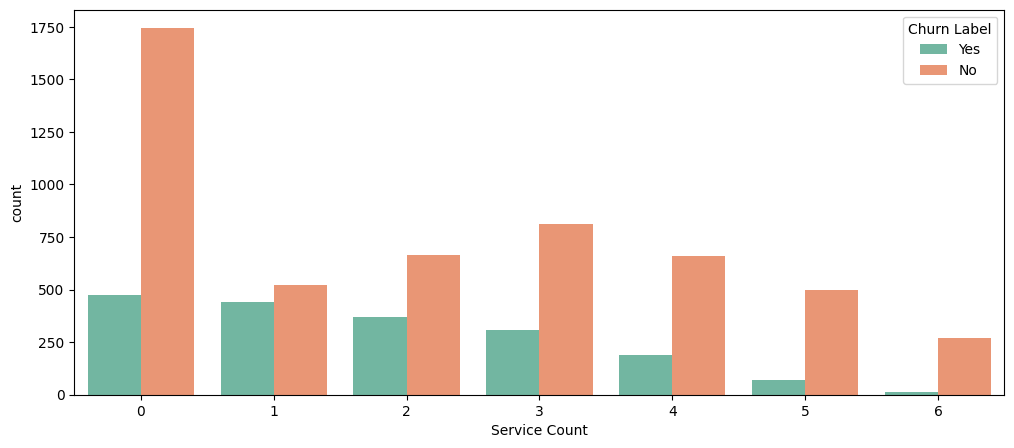

In [83]:
# plot churn vs service count
plt.figure(figsize=(12,5))
sns.countplot(x=df_service['service_count'], hue=df_service['Churn Label'], palette='Set2')
plt.xlabel('Service Count')
plt.show()

This indicates that how much service that customer used isn't important

In [4]:
df2 = pd.read_excel('data_modified_v3.xlsx')
df2.head()

Customer ID  Tenure Months Location Device Class  Games Product  \
0            0              2  Jakarta      Mid End              1   
1            1              2  Jakarta     High End              0   
2            2              8  Jakarta     High End              0   
3            3             28  Jakarta     High End              0   
4            4             49  Jakarta     High End              0   

   Music Product  Education Product  Call Center  Video Product  Use MyApp  \
0              1                  0            0              0          0   
1              0                  0            0              0          0   
2              0                  1            0              1          1   
3              0                  1            1              1          1   
4              1                  1            0              1          1   

   ... CLTV_Category  MonthlyPurchase_Category       tenure_cltv_category  \
0  ...      Low CLTV   Medium Monthly Purchase        Low Tenure Low CLTV   
1  ...      Low CLTV   Medium Monthly Purchase        Low Tenure Low CLTV   
2  ...   Medium CLTV     High Monthly Purchase     Low Tenure Medium CLTV   
3  ...   Medium CLTV     High Monthly Purchase  Medium Tenure Medium CLTV   
4  ...   Medium CLTV     High Monthly Purchase  Medium Tenure Medium CLTV   

   tenure_cltv_churn_rate     tenure_monthly_purchase_category  \
0                0.487218   Low Tenure Medium Monthly Purchase   
1                0.487218   Low Tenure Medium Monthly Purchase   
2                0.503417     Low Tenure High Monthly Purchase   
3                0.226968  Medium Tenure High Monthly Purchase   
4                0.226968  Medium Tenure High Monthly Purchase   

      cltv_monthly_purchase_category  \
0   Low CLTV Medium Monthly Purchase   
1   Low CLTV Medium Monthly Purchase   
2  Medium CLTV High Monthly Purchase   
3  Medium CLTV High Monthly Purchase   
4  Medium CLTV High Monthly Purchase   

             tenure_cltv_monthly_purchase_category  \
0      Low Tenure Low CLTV Medium Monthly Purchase   
1      Low Tenure Low CLTV Medium Monthly Purchase   
2     Low Tenure Medium CLTV High Monthly Purchase   
3  Medium Tenure Medium CLTV High Monthly Purchase   
4  Medium Tenure Medium CLTV High Monthly Purchase   

   tenure_monthly_purchase_churn_rate  cltv_monthly_purchase_churn_rate  \
0                            0.570925                          0.388945   
1                            0.570925                          0.388945   
2                            0.747059                          0.305344   
3                            0.404678                          0.305344   
4                            0.404678                          0.305344   

   tenure_cltv_monthly_purchase_churn_rate  
0                                 0.553699  
1                                 0.553699  
2                                 0.691358  
3                                 0.380048  
4                                 0.380048  

[5 rows x 62 columns]

In [14]:
df2.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)', 'service_used',
       'payment_method_churn_rate', 'location_churn_rate', 'device_churn_rate',
       'games_churn_rate', 'music_churn_rate', 'education_churn_rate',
       'call_center_churn_rate', 'video_churn_rate', 'myapp_churn_rate',
       'service_used_churn_rate', 'device_games_churn_rate',
       'device_music_churn_rate', 'device_education_churn_rate',
       'device_call_center_churn_rate', 'device_video_churn_rate',
       'device_myapp_churn_rate', 'device_service_churn_rate',
       'device_location_churn_rate', 'device_payment_method_churn_rate',
       'location_device_payment_method_churn_rate',
       'location_device_payment_method_service_churn_rate',
    

In [21]:
df2.groupby('Churn Label')['Call Center'].value_counts()

Churn Label  Call Center
0            0              3440
             1              1734
1            0              1559
             1               310
Name: Call Center, dtype: int64

In [ ]:
df